### Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Import the tools and algorithm from sklearn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Algorithm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor


### Import the metrics

In [ ]:
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error

In [ ]:
pwd

'/content'

### Read the Dataset

In [ ]:
df = pd.read_csv("Hospital_stay.csv")

In [ ]:
df.head()

,Location,Time,Hospital_Stay,MRI_Units,CT_Scanners,Hospital_Beds
0,AUS,1992,6.6,1.43,16.71,1.43
1,AUS,1994,6.4,2.36,18.48,2.36
2,AUS,1995,6.5,2.89,20.55,2.89
3,AUS,1996,6.4,2.96,21.95,2.96
4,AUS,1997,6.2,3.53,23.34,3.53


### Feature Engineering

In [ ]:
df.shape

(518, 6)

In [ ]:
df.columns

Index(['Location', 'Time', 'Hospital_Stay', 'MRI_Units', 'CT_Scanners',
       'Hospital_Beds'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       518 non-null    object 
 1   Time           518 non-null    int64  
 2   Hospital_Stay  518 non-null    float64
 3   MRI_Units      518 non-null    float64
 4   CT_Scanners    518 non-null    float64
 5   Hospital_Beds  518 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 24.4+ KB


#### Descripe the statistics of the data

In [ ]:
df.describe()

,Time,Hospital_Stay,MRI_Units,CT_Scanners,Hospital_Beds
count,518.000000,518.000000,518.000000,518.000000,518.000000
mean,2007.967181,7.140154,10.565502,19.646718,10.565502
std,6.944160,2.566864,8.685570,14.352069,8.685570
min,1990.000000,3.400000,0.100000,1.480000,0.100000
25%,2003.250000,5.800000,4.072500,10.332500,4.072500
50%,2009.000000,6.650000,8.765000,15.375000,8.765000
75%,2014.000000,7.500000,13.877500,26.592500,13.877500
max,2018.000000,32.700000,55.210000,111.490000,55.210000


#### Check the missing values

In [ ]:
df.isnull().sum()

Location         0
Time             0
Hospital_Stay    0
MRI_Units        0
CT_Scanners      0
Hospital_Beds    0
dtype: int64

- In this data null values is not exists

### Preprocessing Techniques

In [ ]:
df

,Location,Time,Hospital_Stay,MRI_Units,CT_Scanners,Hospital_Beds
0,AUS,1992,6.6,1.43,16.71,1.43
1,AUS,1994,6.4,2.36,18.48,2.36
2,AUS,1995,6.5,2.89,20.55,2.89
3,AUS,1996,6.4,2.96,21.95,2.96
4,AUS,1997,6.2,3.53,23.34,3.53
...,...,...,...,...,...,...
513,LTU,2014,6.8,10.57,22.17,10.57
514,LTU,2015,6.6,11.02,21.00,11.02
515,LTU,2016,6.6,12.20,23.01,12.20
516,LTU,2017,6.5,12.37,23.33,12.37


In [ ]:
df.corr()

,Time,Hospital_Stay,MRI_Units,CT_Scanners,Hospital_Beds
Time,1.000000,-0.360443,0.477647,0.274668,0.477647
Hospital_Stay,-0.360443,1.000000,0.058874,0.249306,0.058874
MRI_Units,0.477647,0.058874,1.000000,0.759864,1.000000
CT_Scanners,0.274668,0.249306,0.759864,1.000000,0.759864
Hospital_Beds,0.477647,0.058874,1.000000,0.759864,1.000000


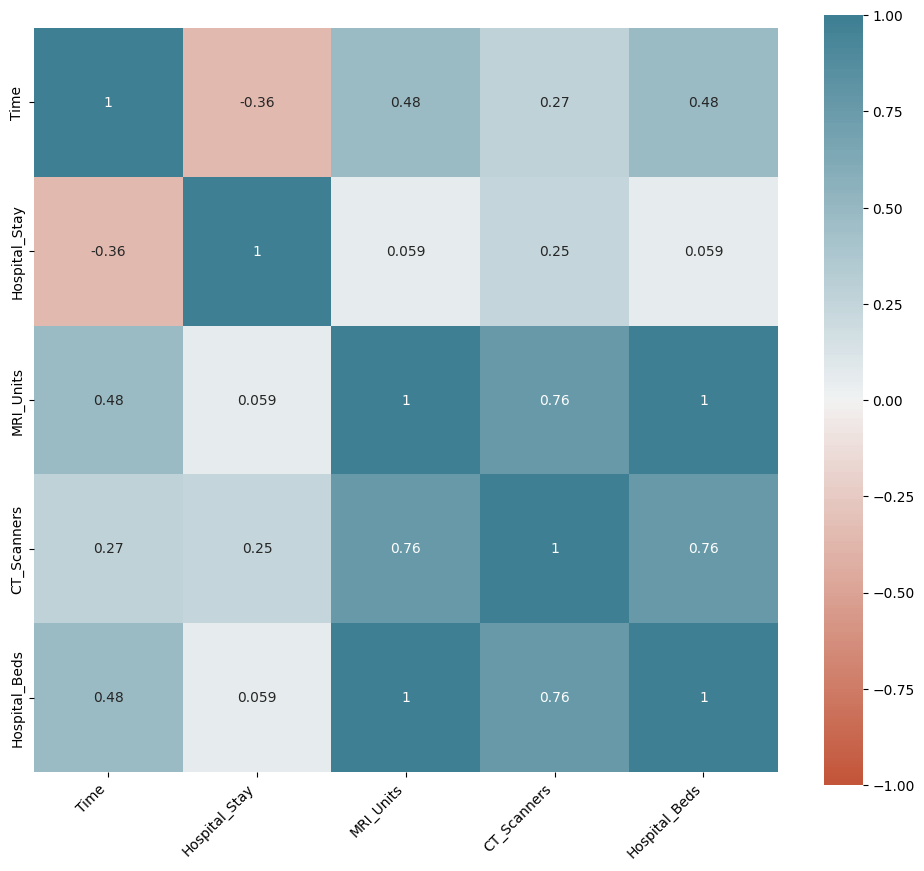

In [ ]:
f, ax = plt.subplots(figsize=(12, 10))
corr = df.corr()
ax = sns.heatmap(
    corr,annot=True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Exploratory Data Analysis

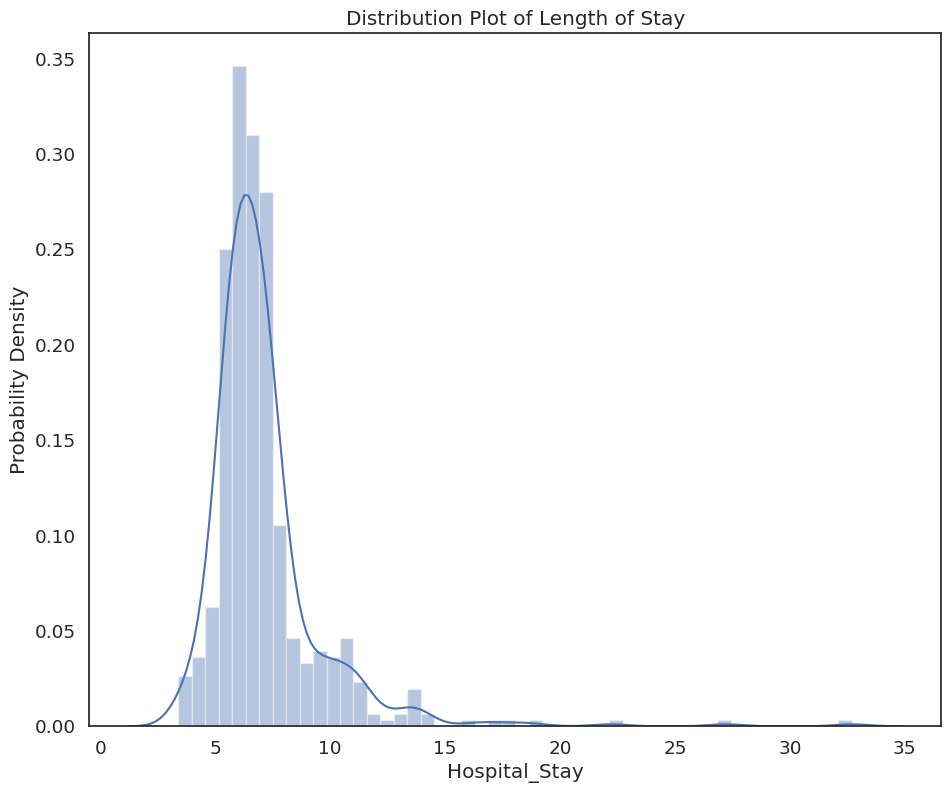

In [ ]:
sns.set(font_scale=1.2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(11, 9))
sns.distplot(df['Hospital_Stay'], norm_hist=False);
plt.ylabel('Probability Density')
plt.title('Distribution Plot of Length of Stay')
plt.show()

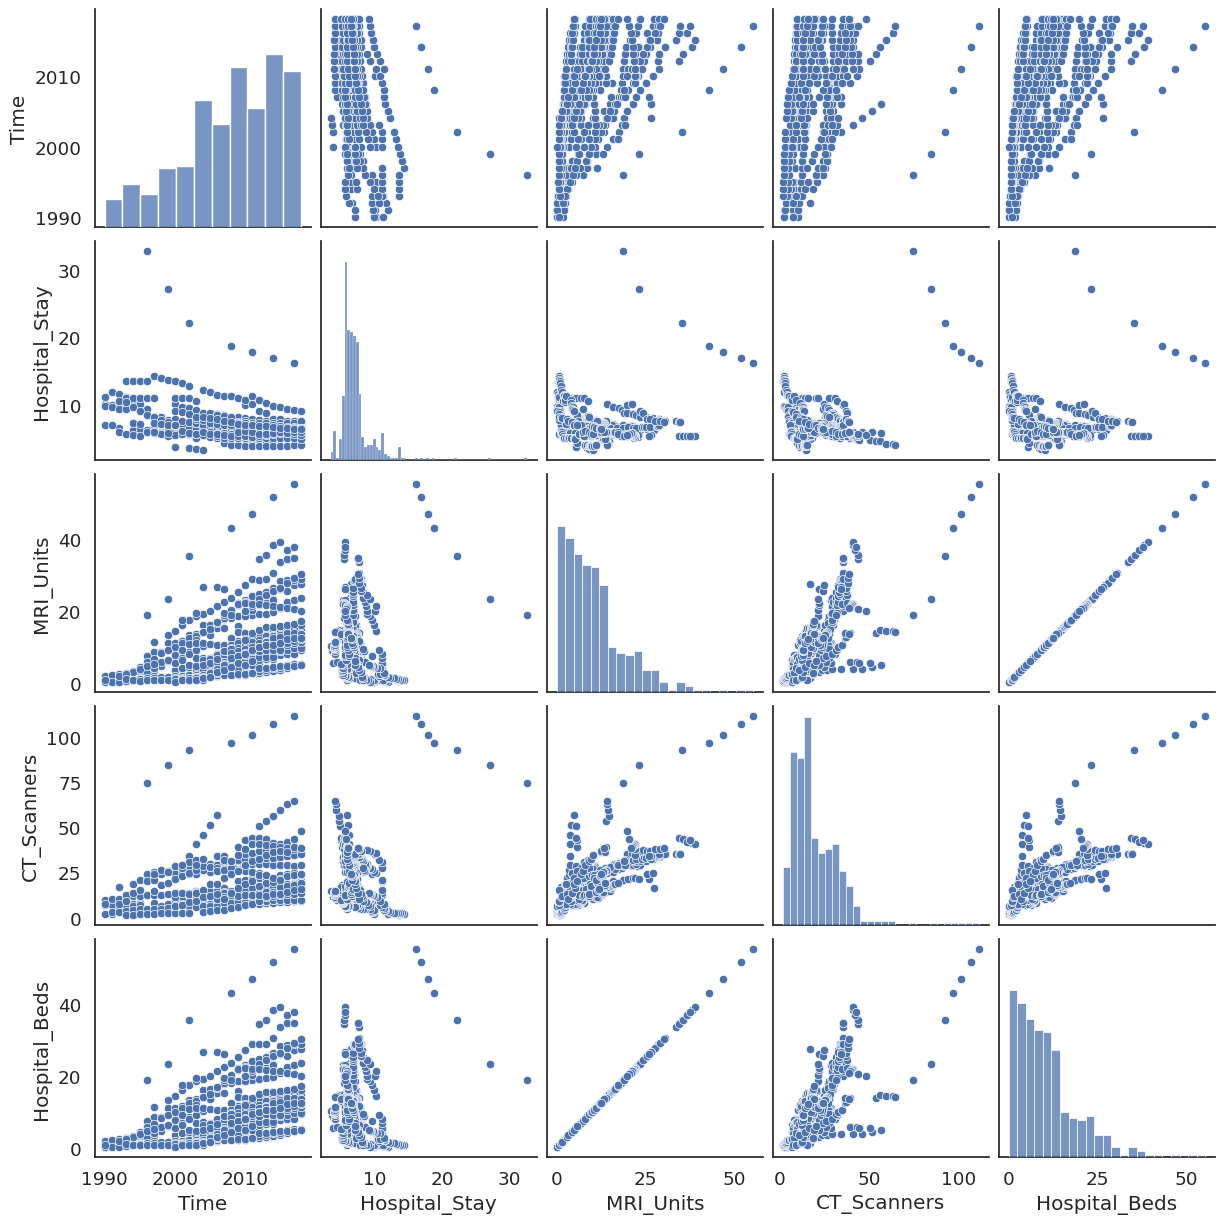

In [ ]:
sns.pairplot(df)

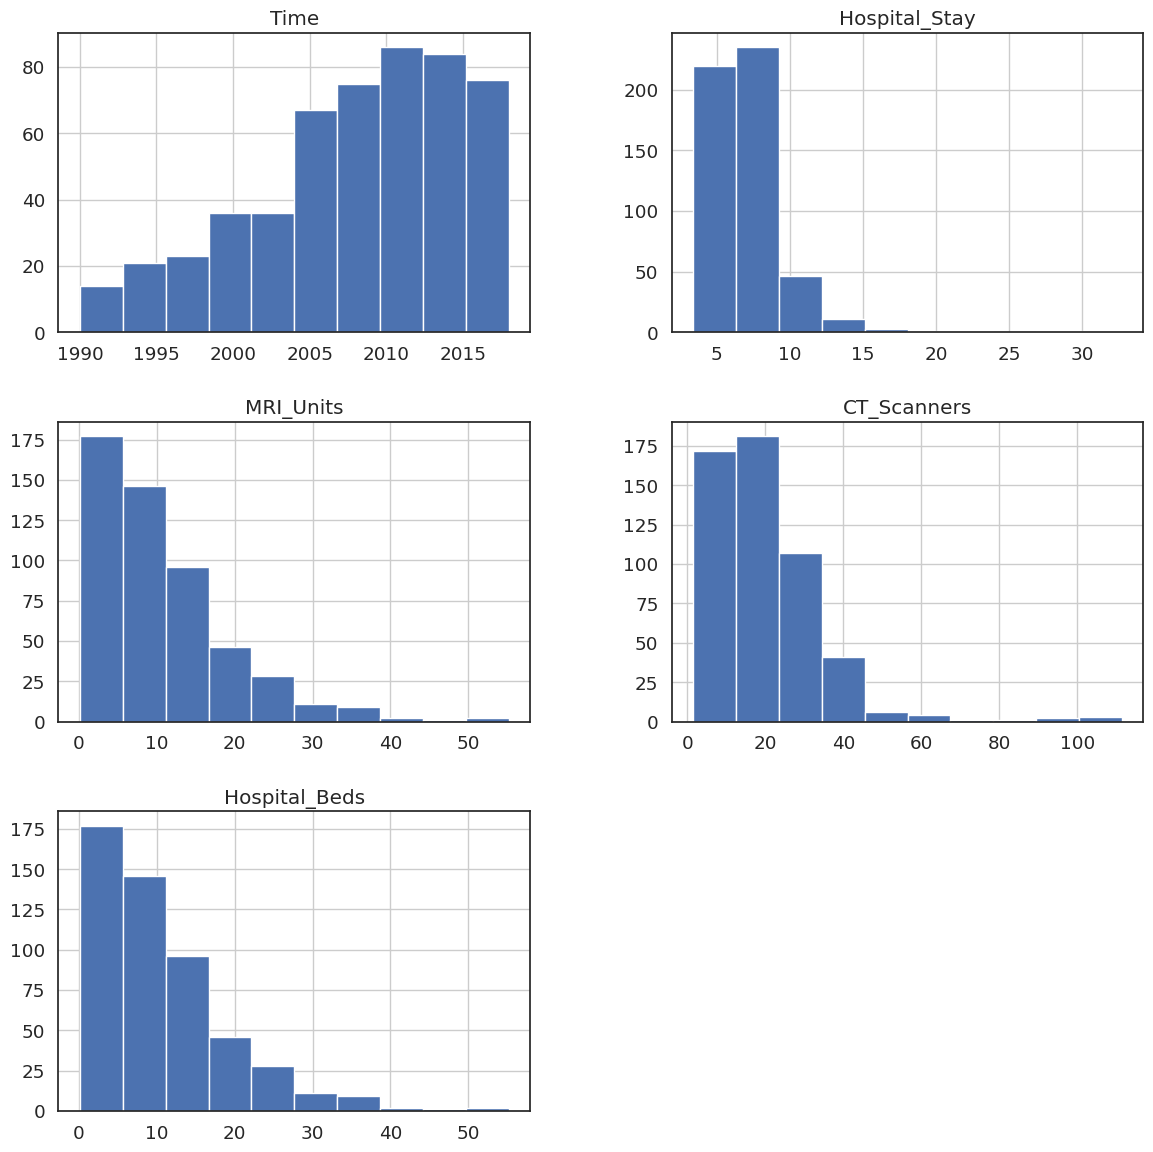

In [ ]:
#distribution of the data
df.hist(figsize=(14, 14))
plt.show()

In [ ]:
df.dtypes

Location          object
Time               int64
Hospital_Stay    float64
MRI_Units        float64
CT_Scanners      float64
Hospital_Beds    float64
dtype: object

#### Drop the Location column

In [ ]:
df_1 = df.drop('Location', axis=1)

##### Boxplot

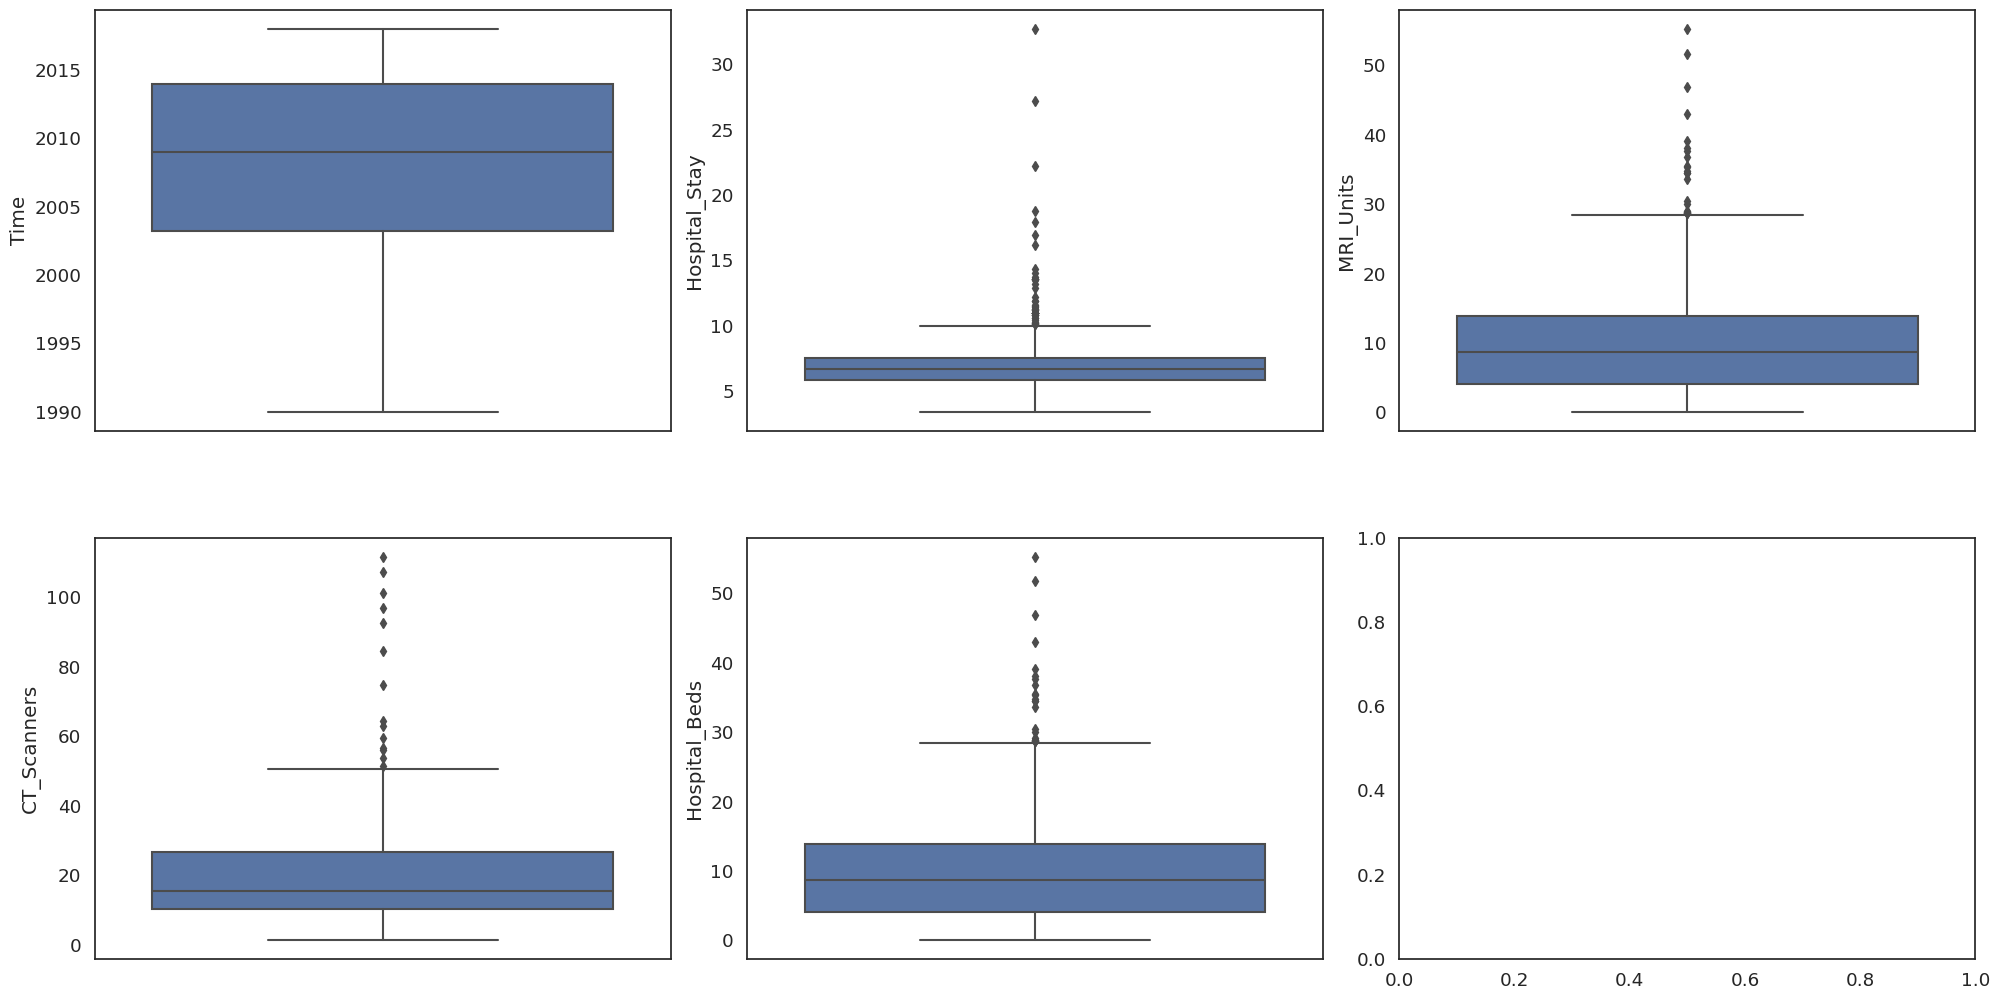

In [ ]:

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,10))
count = 0
ax = ax.flatten()
for i, value in df_1.items():
     sns.boxplot(y = i, data=df_1, ax=ax[count])
     count += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [ ]:
df_1

,Time,Hospital_Stay,MRI_Units,CT_Scanners,Hospital_Beds
0,1992,6.6,1.43,16.71,1.43
1,1994,6.4,2.36,18.48,2.36
2,1995,6.5,2.89,20.55,2.89
3,1996,6.4,2.96,21.95,2.96
4,1997,6.2,3.53,23.34,3.53
...,...,...,...,...,...
513,2014,6.8,10.57,22.17,10.57
514,2015,6.6,11.02,21.00,11.02
515,2016,6.6,12.20,23.01,12.20
516,2017,6.5,12.37,23.33,12.37


#### Encoding

In [ ]:
dummies = pd.get_dummies(df["Location"])

dummies

,AUS,AUT,BEL,CAN,CZE,DEU,DNK,ESP,EST,FIN,...,LVA,NLD,NZL,POL,PRT,RUS,SVK,SVN,TUR,USA
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
514,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
515,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
516,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1 = pd.concat([df_1, dummies], axis=1)

In [ ]:
df1

,Time,Hospital_Stay,MRI_Units,CT_Scanners,Hospital_Beds,AUS,AUT,BEL,CAN,CZE,...,LVA,NLD,NZL,POL,PRT,RUS,SVK,SVN,TUR,USA
0,1992,6.6,1.43,16.71,1.43,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1994,6.4,2.36,18.48,2.36,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1995,6.5,2.89,20.55,2.89,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1996,6.4,2.96,21.95,2.96,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1997,6.2,3.53,23.34,3.53,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2014,6.8,10.57,22.17,10.57,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
514,2015,6.6,11.02,21.00,11.02,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
515,2016,6.6,12.20,23.01,12.20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
516,2017,6.5,12.37,23.33,12.37,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1

,Time,Hospital_Stay,MRI_Units,CT_Scanners,Hospital_Beds,AUS,AUT,BEL,CAN,CZE,...,LVA,NLD,NZL,POL,PRT,RUS,SVK,SVN,TUR,USA
0,1992,6.6,1.43,16.71,1.43,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1994,6.4,2.36,18.48,2.36,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1995,6.5,2.89,20.55,2.89,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1996,6.4,2.96,21.95,2.96,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1997,6.2,3.53,23.34,3.53,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2014,6.8,10.57,22.17,10.57,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
514,2015,6.6,11.02,21.00,11.02,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
515,2016,6.6,12.20,23.01,12.20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
516,2017,6.5,12.37,23.33,12.37,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Split df into X and y

In [ ]:
X = df1.drop('Hospital_Stay', axis=1)
y = df1['Hospital_Stay']

In [ ]:
X.shape

(518, 36)

In [ ]:
y.shape

(518,)

### Train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Scale X with a standard scaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [ ]:
X_train

,Time,MRI_Units,CT_Scanners,Hospital_Beds,AUS,AUT,BEL,CAN,CZE,DEU,...,LVA,NLD,NZL,POL,PRT,RUS,SVK,SVN,TUR,USA
0,0.585141,-0.426666,-0.310388,-0.426666,-0.185164,-0.215041,-0.185164,-0.150329,4.985694,-0.200574,...,-0.16855,-0.193001,-0.159674,-0.177028,0.0,-0.228748,-0.177028,-0.16855,-0.177028,-0.150329
1,-2.324488,-1.005075,-0.847520,-1.005075,-0.185164,-0.215041,-0.185164,-0.150329,-0.200574,-0.200574,...,-0.16855,5.181327,-0.159674,-0.177028,0.0,-0.228748,-0.177028,-0.16855,-0.177028,-0.150329
2,-0.578711,-0.510574,-0.855794,-0.510574,-0.185164,-0.215041,-0.185164,-0.150329,-0.200574,-0.200574,...,-0.16855,5.181327,-0.159674,-0.177028,0.0,-0.228748,-0.177028,-0.16855,-0.177028,-0.150329
3,-1.742563,-0.360658,0.325344,-0.360658,-0.185164,4.650269,-0.185164,-0.150329,-0.200574,-0.200574,...,-0.16855,-0.193001,-0.159674,-0.177028,0.0,-0.228748,-0.177028,-0.16855,-0.177028,-0.150329
4,0.003215,-0.319263,-0.610327,-0.319263,-0.185164,-0.215041,-0.185164,-0.150329,-0.200574,-0.200574,...,-0.16855,-0.193001,-0.159674,-0.177028,0.0,-0.228748,-0.177028,-0.16855,5.648813,-0.150329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,-0.578711,-0.653778,-0.610327,-0.653778,-0.185164,-0.215041,-0.185164,6.652067,-0.200574,-0.200574,...,-0.16855,-0.193001,-0.159674,-0.177028,0.0,-0.228748,-0.177028,-0.16855,-0.177028,-0.150329
358,-2.469970,-0.959205,-0.645492,-0.959205,-0.185164,-0.215041,-0.185164,-0.150329,-0.200574,-0.200574,...,-0.16855,-0.193001,-0.159674,-0.177028,0.0,-0.228748,-0.177028,-0.16855,-0.177028,-0.150329
359,1.458030,2.161070,1.312040,2.161070,-0.185164,-0.215041,-0.185164,-0.150329,-0.200574,-0.200574,...,-0.16855,-0.193001,-0.159674,-0.177028,0.0,-0.228748,-0.177028,-0.16855,-0.177028,-0.150329
360,-2.033526,-1.118071,-1.244681,-1.118071,-0.185164,-0.215041,-0.185164,-0.150329,-0.200574,-0.200574,...,-0.16855,-0.193001,-0.159674,-0.177028,0.0,4.371626,-0.177028,-0.16855,-0.177028,-0.150329


In [ ]:
y_train

94      6.2
289    10.6
291     7.5
23      9.5
365     4.1
       ... 
71      7.3
106     7.0
270     7.5
435    13.6
102     3.7
Name: Hospital_Stay, Length: 362, dtype: float64

In [ ]:
X_train.shape , y_train.shape

((362, 36), (362,))

In [ ]:
X_test.shape , y_test.shape

((156, 36), (156,))

### Principal Component Analysis

In [ ]:
pca = PCA()
pca.fit(X_train)

PCA()

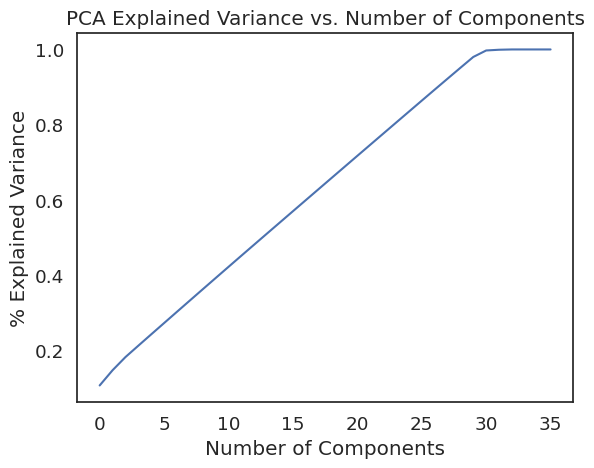

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
pc_vs_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(pc_vs_variance)
plt.xlabel('Number of Components')
plt.ylabel('% Explained Variance')
plt.title('PCA Explained Variance vs. Number of Components')
plt.show()

In [ ]:
pca2 = PCA(n_components=30)
x_train = pca2.fit_transform(X_train)
x_test = pca2.transform(X_test)

In [ ]:
X_train.shape , X_test.shape

((362, 36), (156, 36))

### Training

### 1.LinearRegression

In [ ]:
reg = LinearRegression()
reg.fit(x_train, y_train)

y_train_pred = reg.predict(x_train)
y_pred = reg.predict(x_test)

mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
y_round_pred = np.ndarray.round(y_pred)
y_round_train_pred = np.ndarray.round(y_train_pred)
test_acc = r2_score(y_test, y_round_pred)
train_acc = r2_score(y_train, y_round_train_pred)



In [ ]:
print(mse_train)
print('Train accuracy:', train_acc)

1.0285920581504087
Train accuracy: 0.8266096954516072


In [ ]:
print(mse_test)
print('Test accuracy:', test_acc)

1.1128154558249963
Test accuracy: 0.79322192441684


### 2.KNeighborsRegressor

In [ ]:
KNreg = KNeighborsRegressor()
KNreg.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
y_train_pred = KNreg.predict(x_train)
y_pred = KNreg.predict(x_test)

In [ ]:
mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_train_pred)

In [ ]:
y_round_pred = np.ndarray.round(y_pred)
y_round_train_pred = np.ndarray.round(y_train_pred)

In [ ]:
test_acc = r2_score(y_test, y_round_pred)
train_acc = r2_score(y_train, y_round_train_pred)

In [ ]:
print(mse_train)
print('Train R2_score:', train_acc)

0.6551491712707185
Train R2_score: 0.8871874449080331


In [ ]:
print(mse_test)
print('Test R2_score:', test_acc)

0.6264641025641028
Test R2_score: 0.884073803169143


### 3.Linear_SVR

In [ ]:
Lsvrreg = LinearSVR()
Lsvrreg.fit(x_train, y_train)

y_train_pred = Lsvrreg.predict(x_train)
y_pred = Lsvrreg.predict(x_test)

mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
y_round_pred = np.ndarray.round(y_pred)
y_round_train_pred = np.ndarray.round(y_train_pred)
test_acc = r2_score(y_test, y_round_pred)
train_acc = r2_score(y_train, y_round_train_pred)

In [ ]:
print(mse_train)
print('Train R2_score:', train_acc)


1.345997582311704
Train R2_score: 0.7714332542457543


In [ ]:
print(mse_test)
print('Test R2_score:', test_acc)

1.6020769238464805
Test R2_score: 0.7147771304280676


### 4.Support_Vector_Regressor

In [ ]:
svrreg = SVR()
svrreg.fit(x_train, y_train)

y_train_pred = svrreg.predict(x_train)
y_pred = svrreg.predict(x_test)

mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
y_round_pred = np.ndarray.round(y_pred)
y_round_train_pred = np.ndarray.round(y_train_pred)
test_acc = r2_score(y_test, y_round_pred)
train_acc = r2_score(y_train, y_round_train_pred)

In [ ]:
print(mse_train)
print('Train R2_score:', train_acc)

2.3898192149380417
Train R2_score: 0.6176206146794383


In [ ]:
print(mse_test)
print('Test R2_score:', test_acc)

2.5415278053028496
Test R2_score: 0.5987108536079448


### 5.DecisionTreeRegressor

In [ ]:
Dreg =  DecisionTreeRegressor()
Dreg.fit(x_train, y_train)

y_train_pred = Dreg.predict(x_train)
y_pred = Dreg.predict(x_test)

mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
y_round_pred = np.ndarray.round(y_pred)
y_round_train_pred = np.ndarray.round(y_train_pred)
test_acc = r2_score(y_test, y_round_pred)
train_acc = r2_score(y_train, y_round_train_pred)

In [ ]:
print(mse_train)
print('Train R2_score:', train_acc)

1.307504262797257e-32
Train R2_score: 0.9880672636187342


In [ ]:
print(mse_test)
print('Test R2_score:', test_acc)

0.5102564102564106
Test R2_score: 0.9090880869665832


### 6. RandomForestRegressor

In [ ]:
rfgreg = RandomForestRegressor(max_depth= 10,min_samples_leaf=15,n_estimators=10)
rfgreg.fit(x_train, y_train)

y_train_pred = rfgreg.predict(x_train)
y_pred = rfgreg.predict(x_test)

mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
y_round_pred = np.ndarray.round(y_pred)
y_round_train_pred = np.ndarray.round(y_train_pred)
test_acc = r2_score(y_test, y_round_pred)
train_acc = r2_score(y_train, y_round_train_pred)

In [ ]:
print(mse_train)
print('Train R2_score:', train_acc)

0.48801507450371673
Train R2_score: 0.9151080537109949


In [ ]:
print(mse_test)
print('Test R2_score:', test_acc)

0.7560975790119461
Test R2_score: 0.8588594051013232


### 7.GradientBoostingRegressor

In [ ]:
gbreg = GradientBoostingRegressor()
gbreg.fit(x_train, y_train)

y_train_pred = gbreg.predict(x_train)
y_pred = gbreg.predict(x_test)

mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
y_round_pred = np.ndarray.round(y_pred)
y_round_train_pred = np.ndarray.round(y_train_pred)
test_acc = r2_score(y_test, y_round_pred)
train_acc = r2_score(y_train, y_round_train_pred)

In [ ]:
print(mse_train)
print('Train R2_score:', train_acc)

0.0417231890674207
Train R2_score: 0.9833307317682318


In [ ]:
print(mse_test)
print('Test R2_score:', test_acc)

0.20782845702331662
Test R2_score: 0.9549142548834937


### 8.LightGBMRegressor

In [ ]:
lgbreg = LGBMRegressor()
lgbreg.fit(x_train, y_train)

y_train_pred = lgbreg.predict(x_train)
y_pred = lgbreg.predict(x_test)

mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
y_round_pred = np.ndarray.round(y_pred)
y_round_train_pred = np.ndarray.round(y_train_pred)
test_acc = r2_score(y_test, y_round_pred)
train_acc = r2_score(y_train, y_round_train_pred)

In [ ]:
print(mse_train)
print('Train R2_score:', train_acc)

0.5631692443647557
Train R2_score: 0.9071307369101487


In [ ]:
print(mse_test)
print('Test R2_score:', test_acc)

0.7794378814848922
Test R2_score: 0.8752687752724441


Find the best algorithm for this dataset

In [ ]:
models = {
    "                     Linear Regression": LinearRegression(),
    "                   K-Nearest Neighbors": KNeighborsRegressor(),
    "Support Vector Machine (Linear Kernel)": LinearSVR(),
    "   Support Vector Machine (RBF Kernel)": SVR(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor(),
    "                              LightGBM": LGBMRegressor()
}


### Experimental Result

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " R^2 Score: {:.5f}".format(model.score(X_test, y_test)))

                     Linear Regression R^2 Score: -2427423715109666029568.00000
                   K-Nearest Neighbors R^2 Score: 0.90098
Support Vector Machine (Linear Kernel) R^2 Score: 0.84362
   Support Vector Machine (RBF Kernel) R^2 Score: 0.60897
                         Decision Tree R^2 Score: 0.93519
                         Random Forest R^2 Score: 0.96817
                     Gradient Boosting R^2 Score: 0.95264
                              LightGBM R^2 Score: 0.41449


The best algorithm for this dataset is Random Forest regressor algorihtm

### Predict the new data with Random Forest Regressor

In [ ]:
new = rfgreg.predict([[1,0.3,0.2,0.2,1.0,0.4,0,0,0,0,0,0,0,1,0.4,0.5,0.6,0.3,0.2,0.3,0.2,0,0.33,0,0.32,0.44,0.22,0.6,0.4,0.7]])

In [ ]:
print("The given new patients stay in ",new)

The given new patients stay in  [10.597]
